In [130]:
import pandas as pd
birth = pd.read_csv('Births.csv')
birth.head(5)

,Year,NSW,ACT,QLD,SA,WA,TAS,VIC,NT
0,1977,78173,4381,35069,19086,20981,6739,59602,2923
1,1978,78190,4342,35054,18964,21094,6751,59364,2600
2,1979,77669,4217,34858,18403,20523,6947,58006,2747
3,1980,78859,4181,34666,18317,20354,6660,57768,2859
4,1981,80980,4193,37545,18960,21277,7112,58104,2749


In [131]:
import numpy as np
ind = np.arange(0, 3*2, 2)
width = 0.5

In [132]:
import matplotlib.pyplot as plt 
%matplotlib inline

The below plot shows the number of births recorded in each state/territory for different Australian states over different years.

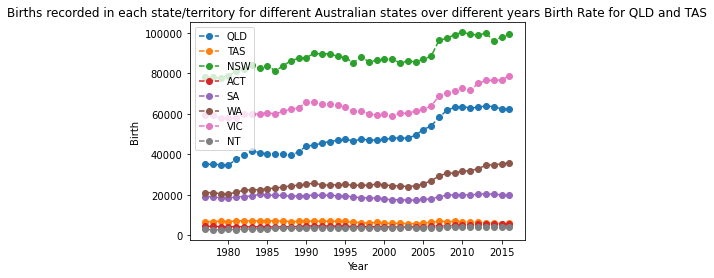

In [133]:
plt.plot(birth.Year,birth.QLD,marker='o', linestyle='--', label='QLD')
plt.plot(birth.Year,birth.TAS,marker='o', linestyle='--', label='TAS')
plt.plot(birth.Year,birth.NSW,marker='o', linestyle='--', label='NSW')
plt.plot(birth.Year,birth.ACT,marker='o', linestyle='--', label='ACT')
plt.plot(birth.Year,birth.SA,marker='o', linestyle='--', label='SA')
plt.plot(birth.Year,birth.WA,marker='o', linestyle='--', label='WA')
plt.plot(birth.Year,birth.VIC,marker='o', linestyle='--', label='VIC')
plt.plot(birth.Year,birth.NT,marker='o', linestyle='--', label='NT')
plt.title('Births recorded in each state/territory for different Australian states over different years Birth Rate for QLD and TAS')
plt.xlabel('Year')
plt.ylabel('Birth') 
plt.legend()
plt.show()



The below plot describes the trend in number of births for Queensland and Tasmania for the period 1977 to 2016

Here we can see that the birth rate for Queensland is growing over year while the birth rate for Tasmania is almost constant and is not increasing over time. 

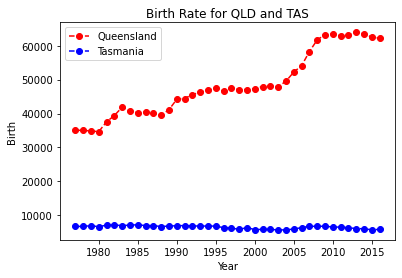

In [134]:
plt.plot(birth.Year,birth.QLD,marker='o', linestyle='--', color='r', label='Queensland')
plt.plot(birth.Year,birth.TAS,marker='o', linestyle='--', color='b', label='Tasmania')
plt.title('Birth Rate for QLD and TAS')
plt.xlabel('Year')
plt.ylabel('Birth') 
plt.legend()
plt.show()



The below graph represents a bar graph to show the number of births in each Australian state in 2016.

['NSW', 'ACT', 'QLD', 'SA', 'WA', 'TAS', 'VIC', 'NT']


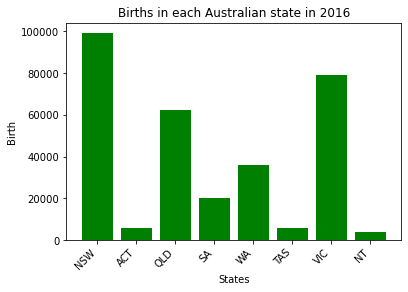

In [135]:
import numpy as np
ind = np.arange(0, 3*2, 2)
width = 0.5 

meltDF = pd.melt(birth, id_vars=['Year'],value_vars=['NSW','ACT','QLD','SA','WA','TAS','VIC','NT'],var_name='Sates')
meltDF
states = list(birth.columns.values)
states.remove('Year')
print(states)
e = birth[birth.Year == 2016]
#print(e)
x = [int(e[val]) for val in states]
#print(x)
#print(val2016)
#birth[val2016]
plt.bar(states,x,color='green')
plt.title('Births in each Australian state in 2016')
plt.xlabel('States')
plt.ylabel('Birth')
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right') 
plt.show()

In [136]:
import pandas as pd
birth = pd.read_csv('Births.csv')
birth.head(5)

,Year,NSW,ACT,QLD,SA,WA,TAS,VIC,NT
0,1977,78173,4381,35069,19086,20981,6739,59602,2923
1,1978,78190,4342,35054,18964,21094,6751,59364,2600
2,1979,77669,4217,34858,18403,20523,6947,58006,2747
3,1980,78859,4181,34666,18317,20354,6660,57768,2859
4,1981,80980,4193,37545,18960,21277,7112,58104,2749


Firstly the total population is computed by aggregating the birth value for each state and a new coloumn 'Australia' is created which has the value of the birth of all states summed together.

For visualisation, firstly,  a scatter plot is plotted, with year in X - Axis and Total Birth value in Y - Axis .
Then linear regression is done for the Total Birth value and line is plotted in the graph.



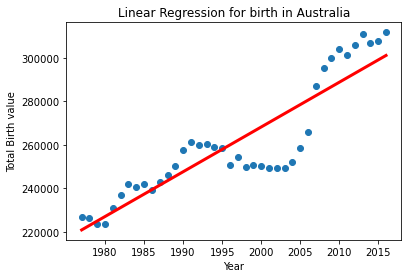

In [137]:
#groupbyYear = birth.groupby(['NSW','ACT','QLD','SA','WA','TAS','VIC','NT']).sum()
#groupbyYear.head(40)
import matplotlib.pyplot as plt
from scipy.stats import linregress
%matplotlib inline
birth['Australia'] = birth['NSW']+ birth['ACT']+birth['QLD']+birth['SA']+birth['WA']+birth['TAS']+birth['VIC']+birth['NT']
slope, intercept, r_value, p_value, std_err = linregress(birth['Year'], birth['Australia'])
line = [slope*xi + intercept for xi in birth['Year']]
plt.plot(birth['Year'],line,'r-', linewidth=3)
plt.title('Linear Regression for birth in Australia')
plt.xlabel('Year')
plt.ylabel('Total Birth value')
plt.scatter(birth['Year'], birth['Australia'])
plt.show()

Now lets plot the same line for future years to predect the value of Birth in future years. For time being I have plotted till the year 2040

In [138]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(birth[['Year']],birth.Australia)


LinearRegression()

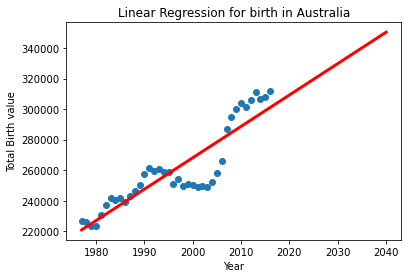

In [139]:
newyear = [[1977],[1978],[1979],[1980],[1981],[1982],[1983],[1984],[1985],[1986],[1987],[1988],[1989],[1990],[1991],[1992],[1993],[1994],[1995],[1997],[1998],[1999],[2000],[2001],[2002],[2003],[2004],[2005],[2006],[2007],[2008],[2009],[2010],[2011],[2012],[2013],[2014],[2015],[2016],[2017],[2018],[2019],[2021],[2022],[2023],[2024],[2025],[2026],[2027],[2028],[2029],[2030],[2031],[2032],[2033],[2034],[2035],[2036],[2037],[2038],[2039],[2040]]
plt.plot(newyear,reg.predict(newyear),'-r',linewidth=3)
plt.title('Linear Regression for birth in Australia')
plt.xlabel('Year')
plt.ylabel('Total Birth value')
plt.scatter(birth['Year'], birth['Australia'])
plt.show()



Linear regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables. We drew the regression line using the formula Y = mX + c, where m and c were found using the linear regression function. 

As you can see, there are some points which is very near the regression line. Hence, its error of prediction is small. By contrast, there are many points which is much higher than the regression line and therefore its error of prediction is large.

For eg, if you consider the graph from year 1995 - 2010, the points are much higher than the regression line and therefore its error of prediction is large.
Considering it as a first model for analysis, it will be fine. But the error of prediction is large and when compared to other models linear regression dont look like a good fit.

The time period time having an unusual trend in the plot is from 1996 - 2003. This is because, from 1975, the total birth tends to increase and from 1996, the value suddenlty tends to decline till 2003. From 2003 again the growth continue to increase till 2016.



Here we need to predict the total births in Australia for the years 2050 and 2100.
We can use the predict function to predict the values for any year

In [140]:
reg.predict([[2050]])

array([370945.74399625])

Here total births in Australia for the years 2050 = 370945.74399625

In [141]:
reg.predict([[2100]])

array([473754.24305816])

Here total births in Australia for the years 2100 = 473754.24305816



Below graph shows linear regression for recent data points ie from year 2010 onwards

It is often difficult to decide just how much data to collect. If the relationship is expected to be linear, then fewer data points are necessary to arrive at the proper regression formula. If the relationship is expected to be non-linear, then more data should be collected in the area where the curve is expected to rapidly change, and less data may be collected where the curve is expected to be more linear.

Here when we consider for years more than 2010, we will have just 7 data points and so the correctness/effiency of the graph would be less. Since we have the birth rate increasing and decreasing, the graph tends to be non-linear and more data should be collected to get a better result.

So the model before starting from 1977 would give a better predictions of future population of Australia than with the model starting from 2010.

    Year     NSW   ACT    QLD     SA     WA   TAS    VIC    NT  Australia
33  2010  100355  5197  63553  20033  31689  6545  72722  3901     303995
34  2011   99385  5098  62888  19856  31846  6545  71593  3922     301133
35  2012   98886  5285  63227  20267  32939  6351  75018  4014     305987
36  2013   99926  5534  63959  20496  34513  6109  76542  4012     311091
37  2014   96119  5606  63490  20205  34932  6030  76594  3987     306963
38  2015   97857  5659  62522  19952  35149  5755  76716  4039     307649
39  2016   99260  5703  62190  19917  35875  5869  78953  3928     311695


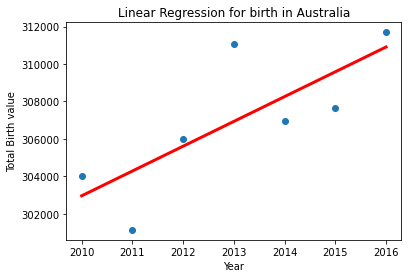

In [142]:
states = list(birth.columns.values)
states.remove('Year')
e = birth[birth.Year >= 2010]
print(e)
slope, intercept, r_value, p_value, std_err = linregress(e['Year'], e['Australia'])
line = [slope*xi + intercept for xi in e['Year']]
plt.plot(e['Year'],line,'r-', linewidth=3)
plt.title('Linear Regression for birth in Australia')
plt.xlabel('Year')
plt.ylabel('Total Birth value')
plt.scatter(e['Year'], e['Australia'])
plt.show()


I have choosed polynomial regression to fit all of the data to capture the trend in the number of births.
A polynomial regression turns a linear regression model into a curve. Nonlinear regression can fit an enormous variety of curves
Polynomial regression would explain the most deviation in the data. Since in our data we have the birth rate increasing and decreasing, it would be alwasy good to use a nonlinear regression model, as it can give us more accurate results.

The graph below shows the curve that fits all the data points. Here we can see that there are more points which are very near the regression line. Hence, its error of prediction is small.

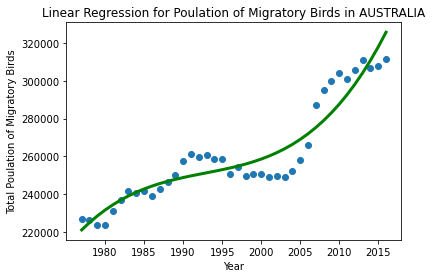

In [143]:
#https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
#birth[['Year']],birth.Australia
poly = PolynomialFeatures(degree = 5) 
X_poly = poly.fit_transform(birth[['Year']]) 
  
poly.fit(X_poly, birth.Australia) 
lin2 = LinearRegression() 
lin2.fit(X_poly, birth.Australia) 

  
#plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.plot(birth['Year'],lin2.predict(poly.fit_transform(birth[['Year']])),'-g',linewidth=3)
plt.title('Linear Regression for Poulation of Migratory Birds in AUSTRALIA')
plt.xlabel('Year')
plt.ylabel('Total Poulation of Migratory Birds')
plt.scatter(birth['Year'], birth['Australia'])
plt.show()

Here I have shown both the straight line of linear regression and curve of polynomial regression. 

Here we can see that for the curve drawn using  polynomial regression there are more points which are very near the regression line. Hence, its error of prediction is small. Wheras for the line drawn using linear regression, there are more points which are far from the regression line

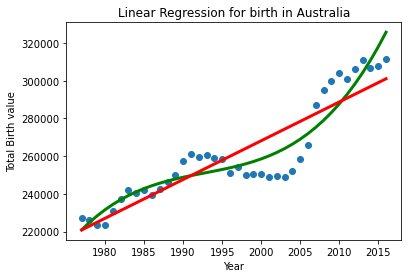

In [144]:
#https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
#birth[['Year']],birth.Australia
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(birth[['Year']]) 
  
poly.fit(X_poly, birth.Australia) 
lin2 = LinearRegression() 
lin2.fit(X_poly, birth.Australia) 
slope, intercept, r_value, p_value, std_err = linregress(birth['Year'], birth['Australia'])
line = [slope*xi + intercept for xi in birth['Year']]
  

plt.plot(birth['Year'],lin2.predict(poly.fit_transform(birth[['Year']])),'-g',linewidth=3)
plt.plot(birth['Year'],line,'r-', linewidth=3)
plt.title('Linear Regression for birth in Australia')
plt.xlabel('Year')
plt.ylabel('Total Birth value')
plt.scatter(birth['Year'], birth['Australia'])
plt.show()

Here total births in Australia for the years 2050 using polynomial regression = 1137783.89739227

In [145]:
lin2.predict(poly.fit_transform([[2050]]))

array([1137783.89739227])

Here total births in Australia for the years 2100 using polynomial regression = 5872238.8043441

In [146]:
lin2.predict(poly.fit_transform([[2100]]))

array([5872238.80434418])

In [147]:
import pandas as pd
tfr = pd.read_csv('TFR.csv')
tfr.head(5)

,Year,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,1971,2.806,2.858,3.025,2.629,3.047,2.903,4.029,2.908
1,1972,2.653,2.634,2.854,2.423,2.673,2.695,3.477,2.728
2,1973,2.385,2.393,2.637,2.192,2.391,2.461,3.291,2.493
3,1974,2.303,2.298,2.500,2.113,2.263,2.422,2.988,2.444
4,1975,2.125,2.099,2.316,1.999,2.182,2.232,2.846,2.137


In [148]:
tfr['QLD'].min()

1.8

Here we can see that minimum value for TFR recorded in the dataset for Queensland = 1.8

In [149]:
low = (tfr.QLD == (tfr['QLD'].min()))
tfr[low].Year

28    1999
Name: Year, dtype: int64

Here we can see that minimum value for TFR recorded in the dataset for Queensland occured in the year 1999

In [150]:
filt = (tfr.Year == 1999)
tfr[filt].NT

28    2.123
Name: NT, dtype: float64

Here we can see that the corresponding TFR value for Northern Territory in the sameyear(1999) is 2.123

In [151]:
import pandas as pd
death = pd.read_csv('Deaths.csv')
bir = pd.read_csv('Births.csv')
death.head(5)

,Year,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,1977,42075,30067,16991,9715,7914,3227,715,786
1,1978,40121,29343,16353,9768,7781,3299,612,782
2,1979,39975,29523,16627,9748,7779,3318,586,759
3,1980,39799,28925,15774,9536,8078,3199,588,755
4,1981,39979,29144,17195,9806,8345,3494,671,795


Here to calculate the growth, I have created a new dataframe which subtracts the value of death from birth

In [152]:
new = bir - death
new['Year'] = bir['Year']
new['Australia'] = new['NSW']+ new['ACT']+new['QLD']+new['SA']+new['WA']+new['TAS']+new['VIC']+new['NT']

In [153]:
new.head()

,ACT,NSW,NT,QLD,SA,TAS,VIC,WA,Year,Australia
0,3595,36098,2208,18078,9371,3512,29535,13067,1977,115464
1,3560,38069,1988,18701,9196,3452,30021,13313,1978,118300
2,3458,37694,2161,18231,8655,3629,28483,12744,1979,115055
3,3426,39060,2271,18892,8781,3461,28843,12276,1980,117010
4,3398,41001,2078,20350,9154,3618,28960,12932,1981,121491


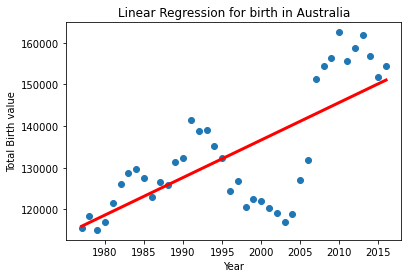

In [154]:
slope, intercept, r_value, p_value, std_err = linregress(new['Year'], new['Australia'])
line = [slope*xi + intercept for xi in new['Year']]
plt.plot(new['Year'],line,'r-', linewidth=3)
plt.title('Linear Regression for birth in Australia')
plt.xlabel('Year')
plt.ylabel('Total Birth value')
plt.scatter(new['Year'], new['Australia'])
plt.show()


In [155]:
import pandas as pd
nom = pd.read_csv('NOM.csv')
nom.head(5)

,Year,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,1977,25236,17969,4012,2874,6631,506,408,261
1,1978,25825,18068,6857,2638,7340,428,1428,131
2,1979,28086,15874,6489,541,3698,263,442,-256
3,1980,33499,20932,9480,3325,7309,599,361,436
4,1981,47291,29052,18168,6655,14866,1268,1043,832


In [156]:
import numpy as np
ind = np.arange(0, 3*2, 2)
width = 0.5
import matplotlib.pyplot as plt 
%matplotlib inline

Here we have plotted the NOM to Victoria, Tasmania and Western Australia over time

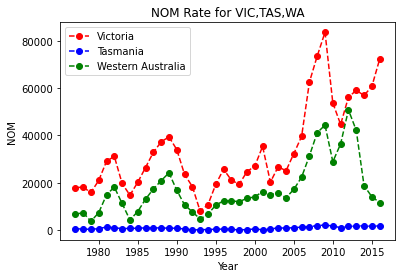

In [157]:
plt.plot(nom.Year,nom.VIC,marker='o', linestyle='--', color='r', label='Victoria')
plt.plot(nom.Year,nom.TAS,marker='o', linestyle='--', color='b', label='Tasmania')
plt.plot(nom.Year,nom.WA,marker='o', linestyle='--', color='g', label='Western Australia')
plt.title('NOM Rate for VIC,TAS,WA')
plt.xlabel('Year')
plt.ylabel('NOM') 
plt.legend()
plt.show()

Here we can see that NOM for tasmania has remained constant over the years. Starting from 1975 till 2015 the rate of NOM has remained constant

When we compare the value of NOM of Victoria and Western Australia, Victoria has always remained higher than Western Australia. The highest value of NOM for Victoria was during 2009 with around 80000 and lowest being around 8000 at 1993.
Wheras, for Western Australia, the highest value of NOM was around 50000 at 2012.



Here NOM for australia is maximum at year 2009 and then there is a sudden decline in the population in 2010.
Lowest population level was during the year 1993

From 1993 Net Overseas Migration was increasing rapidly due to increased education level in Australia because of which student coming to Australia from different countries started increasing. Also the job oppurtunities was rapidly increasing which attracted more people from other countries

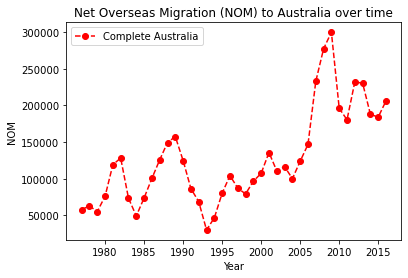

In [158]:
nom['Australia'] = nom['NSW']+ nom['ACT']+nom['QLD']+nom['SA']+nom['WA']+nom['TAS']+nom['VIC']+nom['NT']
plt.plot(nom.Year,nom.Australia,marker='o', linestyle='--', color='r', label='Complete Australia')
plt.title('Net Overseas Migration (NOM) to Australia over time')
plt.xlabel('Year')
plt.ylabel('NOM') 
plt.legend()
plt.show()

In [159]:
import pandas as pd
nim = pd.read_csv('NIM.csv')
nom = pd.read_csv('NOM.csv')
combine = pd.merge(nim, nom, on=['Year'])

In [160]:
combine.head()

,Year,NSW_x,VIC_x,QLD_x,SA_x,WA_x,TAS_x,NT_x,ACT_x,NSW_y,VIC_y,QLD_y,SA_y,WA_y,TAS_y,NT_y,ACT_y
0,1977,-9000,-10000,11000,0,5000,-1000,2000,2000,25236,17969,4012,2874,6631,506,408,261
1,1978,-2000,-11000,12000,-1500,1500,-1000,1500,500,25825,18068,6857,2638,7340,428,1428,131
2,1979,1500,-11000,13000,-4000,1000,-500,500,-500,28086,15874,6489,541,3698,263,442,-256
3,1980,-2000,-11000,17000,-4500,1500,-1000,500,-500,33499,20932,9480,3325,7309,599,361,436
4,1981,-14963,-15398,35054,-5109,2134,-1014,335,-1039,47291,29052,18168,6655,14866,1268,1043,832


Here the dataframe contains data from both NOM and NIM tables together for each state for a given Year. The coloumns ending with x represents the value of NIM and coloumns ending with y represents the value of NOM.

In [161]:
combine.Year.head(1)

0    1977
Name: Year, dtype: int64

First year of the combined data is 1977

In [162]:
combine.Year.tail(1)

39    2016
Name: Year, dtype: int64

Last year of the combined data is 2016

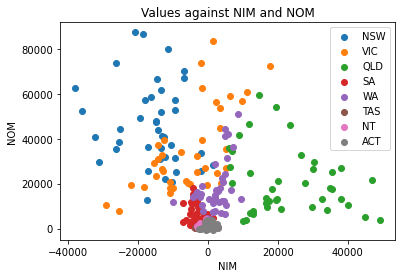

In [163]:
plt.scatter(combine['NSW_x'], combine['NSW_y'], label='NSW')
plt.scatter(combine['VIC_x'], combine['VIC_y'], label='VIC')
plt.scatter(combine['QLD_x'], combine['QLD_y'], label='QLD')
plt.scatter(combine['SA_x'], combine['SA_y'], label='SA')
plt.scatter(combine['WA_x'], combine['WA_y'], label='WA')
plt.scatter(combine['TAS_x'], combine['TAS_y'], label='TAS')
plt.scatter(combine['NT_x'], combine['NT_y'], label='NT')
plt.scatter(combine['ACT_x'], combine['ACT_y'], label='ACT')
plt.title('Values against NIM and NOM')
plt.xlabel('NIM')
plt.ylabel('NOM') 
plt.legend()
plt.show()

It is really difficult to find a relationship between NOM and NIM here in this scatter plot since we are plotting lot of states together. But we can see that, for ACT, NIM and NOM have remained 0 throughout. For QLD, the NIM values have been always gain and there is no much change in NOM Values.

Since we are representing many states together, the scatter plots of many states are overlapping each other and it is difficult to understand

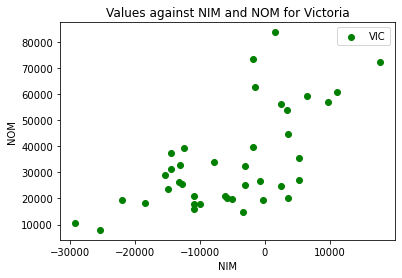

In [164]:
plt.scatter(combine['VIC_x'], combine['VIC_y'],label='VIC',color = 'g')
plt.title('Values against NIM and NOM for Victoria')
plt.xlabel('NIM')
plt.ylabel('NOM') 
plt.legend()
plt.show()

Here a scatter plot is plotted with NIM values in X - Axis and NOM values in Y - Axis for Victoria alone

Now we can easily understand the relationship between NIM and NOM since now we have data only for VIC.
Here what we see is than whenever the NIM values are negative, the NOM values have remained less. While, when the NIM values are positive, the NOM values have remained high.

That is, negative NIM means outflow is more when compared to inflow. So when there is a high interstate migration inflow, there is less overseas migration outflow. When there is a high interstate migration outflow, there is more overseas migration outflow

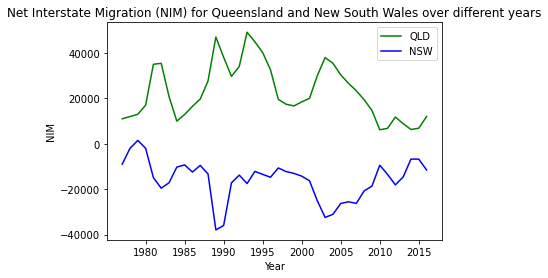

In [165]:
plt.plot(combine['Year'], combine['QLD_x'],label='QLD',color = 'g')
plt.plot(combine['Year'], combine['NSW_x'],label='NSW',color = 'b')
plt.title('Net Interstate Migration (NIM) for Queensland and New South Wales over different years')
plt.xlabel('Year')
plt.ylabel('NIM') 
plt.legend()
plt.show()

Here I have plotted the Net Interstate Migration (NIM) for Queensland and New South Wales over different years. 

We can see that the value for Net Interstate Migration (NIM) over the years for Queensland have remained greater than 0 always that is a postive value all the years.

Whereas the value for Net Interstate Migration (NIM) over the years for New South Wales have remained less than 0 always that is a negative value all the years.



Here first all the CSV files are read.
For TFR dataset, it has data from years 1971. So filter the data for TFR and consider only the data from 1976.
Next we use melt function to melt the dataset and convert the coloumn values to the row values.
After doing this, we do join all the seperate dataset into a single dataset by using the merge function.
Just while doing the join for TFR dataset, we do Outer join. This is because for TFR dataset, the data is available only till 2015 and for all other datasets, data is available till 2015.


In [166]:
#Here first all the CSV files are read.
import pandas as pd
birth = pd.read_csv('Births.csv')
death = pd.read_csv('Deaths.csv')
nim = pd.read_csv('NIM.csv')
nom = pd.read_csv('NOM.csv')
tfr = pd.read_csv('TFR.csv')
states = list(birth.columns.values)
states.remove('Year')
#For TFR dataset, it has data from years 1971. So filter the data for TFR and consider only the data from 1976.
newtfr = tfr[tfr['Year'] > 1976]

birthMelt  = pd.melt(birth, id_vars=['Year'], value_vars= states, var_name='State')
deathMelt  = pd.melt(death, id_vars=['Year'], value_vars= states ,var_name='State')
nimMelt = pd.melt(nim, id_vars=['Year'], value_vars= states ,var_name='State')
nomMelt = pd.melt(nom, id_vars=['Year'], value_vars= states ,var_name='State')
tfrMelt = pd.melt(newtfr, id_vars=['Year'], value_vars= states ,var_name='State')

#newDF = pd.DataFrame({'Year':birthMelt['Year'],
#                      'State':birthMelt['State'],
#                      'Birth':birthMelt['value'],
#                      'Death':deathMelt['value'],
#                      'NIM':nimMelt['value'],
#                      'NOM':nomMelt['value'],
#                      'TFR':tfrMelt['value']
#                     })
merged1 = pd.merge(left= birthMelt,right= deathMelt, left_on=('Year','State'), right_on=('Year','State'))
merged1.rename(columns = {'value_x':'Birth','value_y':'Death'},inplace = True)
merged2 = pd.merge(left= merged1,right= nimMelt, left_on=('Year','State'), right_on=('Year','State'))
merged2.rename(columns = {'value':'NIM'},inplace = True)
merged3 = pd.merge(left= merged2,right= nomMelt, left_on=('Year','State'), right_on=('Year','State'))
merged3.rename(columns = {'value':'NOM'},inplace = True)

#Outer join
merged4 = pd.merge(left= merged3,right= tfrMelt, left_on=('Year','State'), right_on=('Year','State'),how='outer')

merged4.rename(columns = {'value':'TFR'},inplace = True)
merged4['Growth'] = merged4['Birth'] - merged4['Death']
merged4




,Year,State,Birth,Death,NIM,NOM,TFR,Growth
0,1977,NSW,78173,42075,-9000,25236,1.995,36098
1,1978,NSW,78190,40121,-2000,25825,1.953,38069
2,1979,NSW,77669,39975,1500,28086,1.902,37694
3,1980,NSW,78859,39799,-2000,33499,1.925,39060
4,1981,NSW,80980,39979,-14963,47291,1.942,41001
...,...,...,...,...,...,...,...,...
315,2012,NT,4014,1020,-691,3326,2.163,2994
316,2013,NT,4012,1070,-481,4354,2.062,2942
317,2014,NT,3987,1123,-2421,1752,2.041,2864
318,2015,NT,4039,1182,-2341,2354,2.009,2857


In [167]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>





It is quite difficult to say a relationship Net Overseas Migration (NOM) and Net Interstate Migration (NIM) overtime but then what we can see is that for ACT, NIM and NOM have remained 0 throughout. For QLD, the NIM values have been always gain and there is no much change in NOM Values. 

At year 2006 VIC have a higher Net Overseas Migration (NOM) than NSW. This is can be seen from the Motion chart.
The python code to support the answer is given below.

In [168]:
combinefill = combine[combine['VIC_y'] > combine['NSW_y']]
combinefill['Year']

29    2006
Name: Year, dtype: int64

Here we can see in the below screenshots that at year 2006 VIC have a higher Net Overseas Migration (NOM) than NSW.

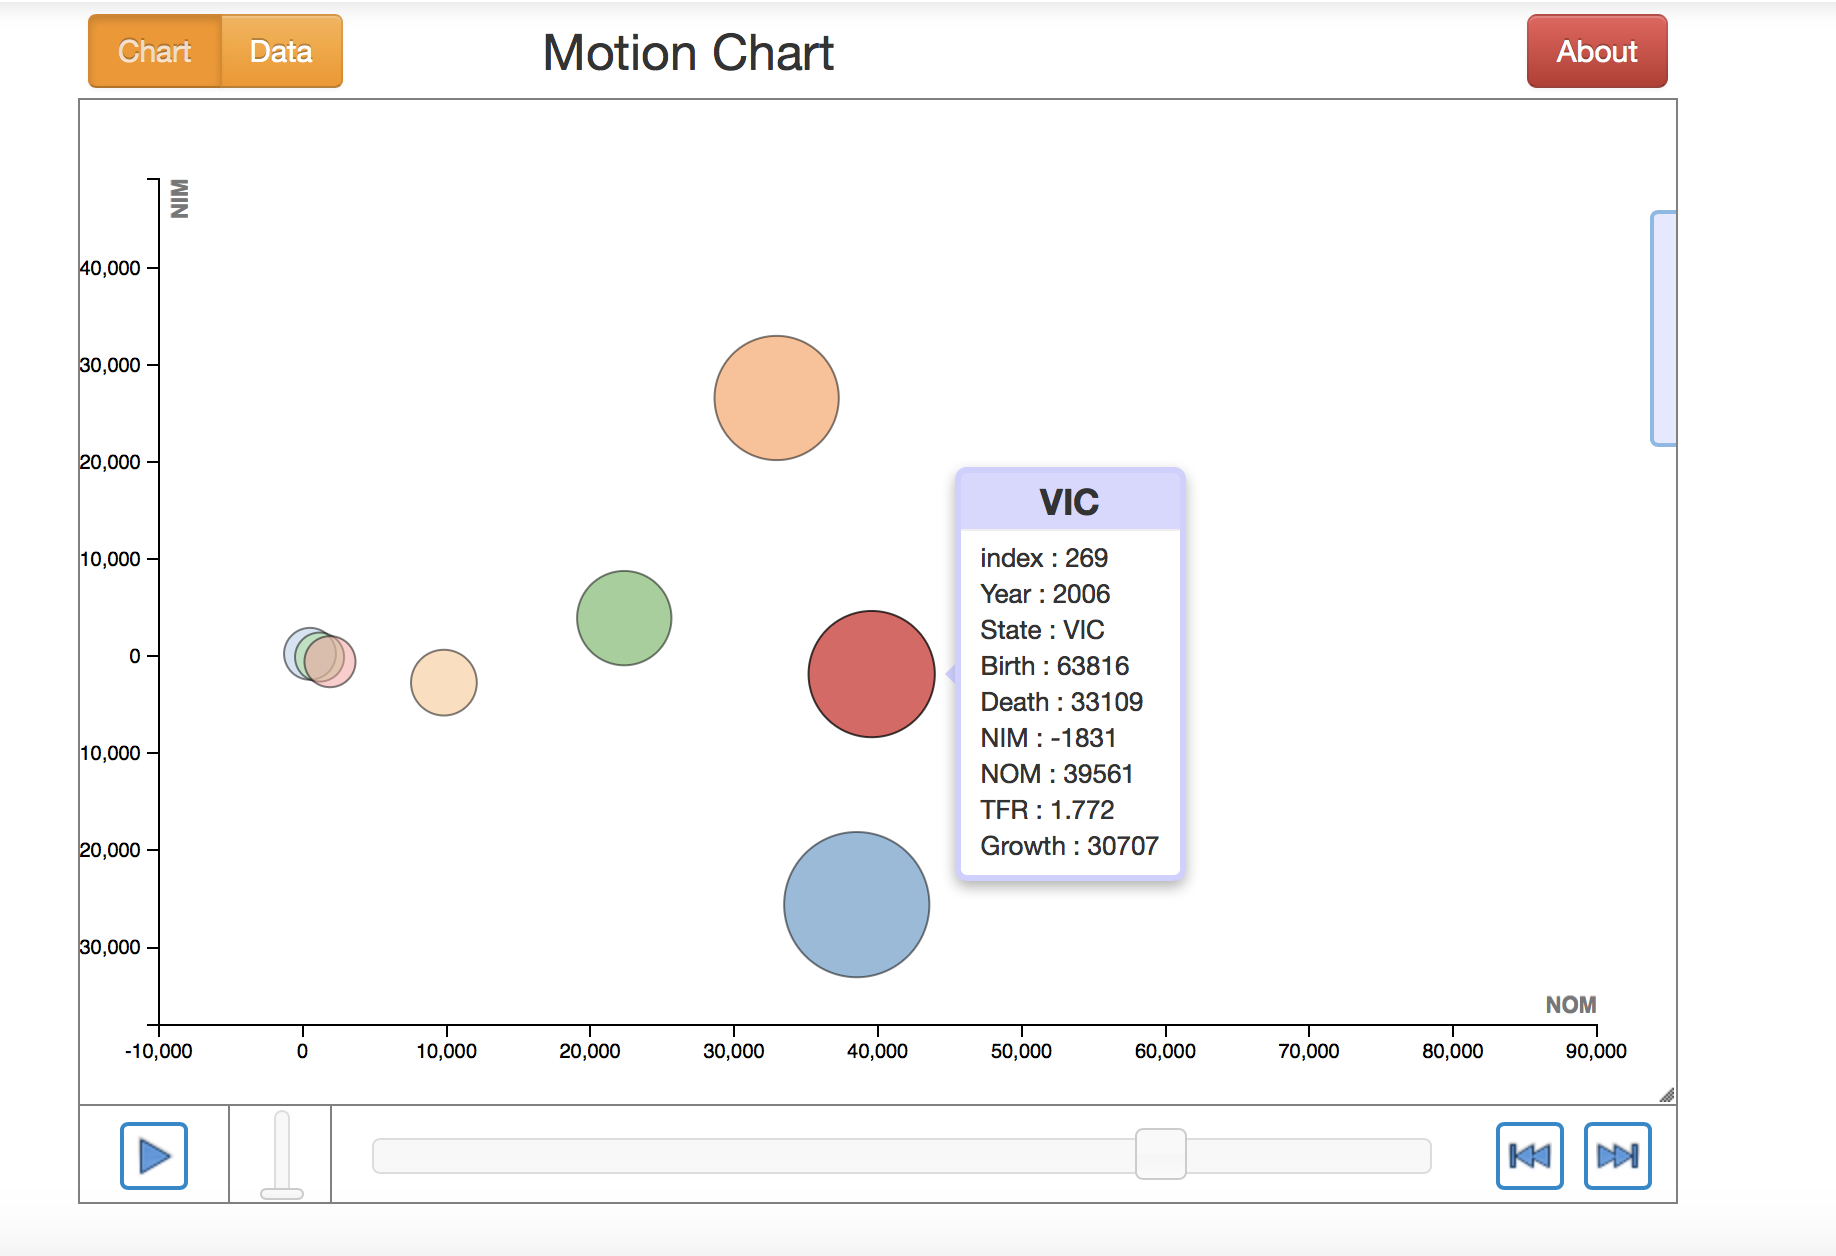

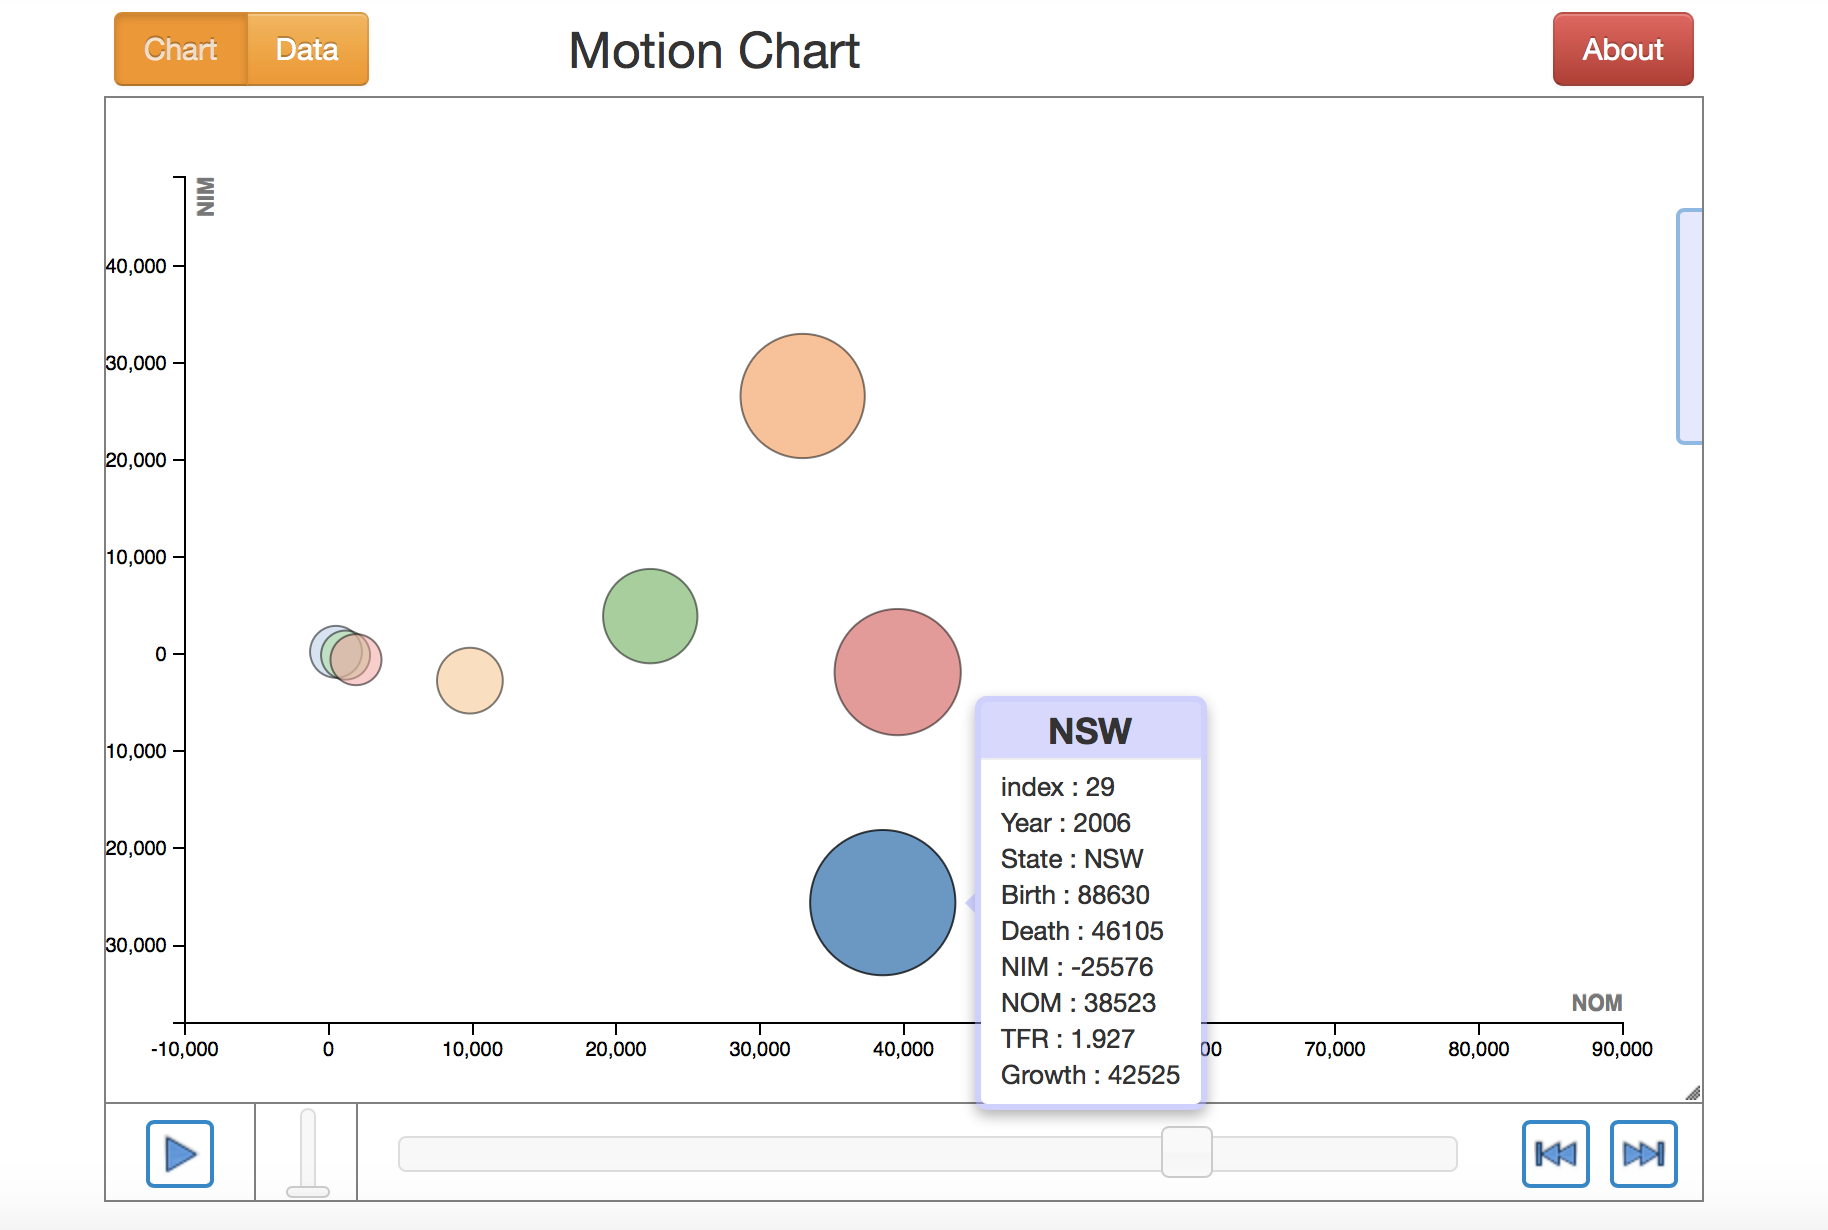

From the Motions chart it is visible that Queensland(QLD) which is the orange bubble remains at the top almost all the years. Therefore Queensland(QLD) has the highest Net Interstate Migration most of the years (for the period 1977 to 2016)

In [169]:
import pandas as pd
crime = pd.read_csv('Crime_Statistics_SA_2014_2019.csv')
#crime.dtypes
crime.head(100)

FileNotFoundError: [Errno 2] File Crime_Statistics_SA_2014_2019.csv does not exist: 'Crime_Statistics_SA_2014_2019.csv'

Here we first group by date and suburb to get the total value of offence count in a day in a suburb

In [ ]:
groupCrime = crime.groupby(['Reported Date','Suburb - Incident'])['Offence Count']
newDF = pd.DataFrame(groupCrime.sum())
newDF.reset_index()

Next, We select only the rows which has Offence Count more than 15

In [ ]:
newDF = newDF[newDF['Offence Count'] > 14]
newDF.head()
newDF = newDF.reset_index()

In [ ]:
len(newDF['Reported Date'].unique())

Therefore, number of days that at least 15 crimes have occurred per day = 897

In [ ]:
suburblist = newDF['Suburb - Incident'].unique()
print(suburblist )

Therefore,'ADELAIDE' 'NURIOOTPA' 'NOT DISCLOSED' 'MURRAY BRIDGE' 'MOUNT BARKER' 'MODBURY' 'GLENELG' 'LOXTON' 'MOUNT GAMBIER' 'PORT LINCOLN' 'PROSPECT' 'OAKLANDS PARK' 'PORT AUGUSTA' 'DAVOREN PARK' 'SALISBURY NORTH' 'FINDON' 'SEAFORD MEADOWS' 'MORPHETT VALE' 'ST GEORGES' 'MARLESTON' 'ASCOT PARK'  are the suburbs which for which least one day the daily number of crimes are more than 15.

In [ ]:
groupCount = newDF.groupby(['Suburb - Incident']).count()
groupCount.rename(columns = {'Offence Count':'Number of days'},inplace = True)  
groupCount.rename(columns = {'Suburb - Incident':'Suburb'}) 
groupCount = groupCount.reset_index()
groupCount

In [ ]:
import numpy as np
ind = np.arange(0, 3*2, 2)
width = 0.5  
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:

groupCount

In [ ]:
#fig, ax = plt.subplots()
plt.bar(groupCount['Suburb - Incident'],groupCount['Number of days'],color='green')
plt.xlabel("Suburb")
plt.ylabel("No. of Days")
plt.title("Number of days that at least 15 crimes have occurred for the suburbs")
#http://benalexkeen.com/bar-charts-in-matplotlib/
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right') 
plt.show()

This graph plots the number of days that at least 15 crimes have occurred for the suburbs


Box plot would be an appropriate graph to visualize and detect outliers (extreme values)

In [ ]:
newDF.boxplot(column = 'Offence Count', by = 'Suburb - Incident')
#plt.ylim(0, 600) 
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right') 
plt.show()

Here from the boxplot, it is clearly visible that there are many outliers (extreme values) for the Suburb ADELAIDE.

In [ ]:
groupCount.boxplot(column = 'Number of days', by = 'Suburb - Incident')
#plt.ylim(0, 600) 
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right') 
plt.show()

In [ ]:
fill1 = groupCount[groupCount['Suburb - Incident'] != 'ADELAIDE']
fill2 = groupCount[groupCount['Suburb - Incident'] == 'ADELAIDE']

Since the Suburb ADELAIDE has extreme values, we can remove the values for ADELAIDE and plot for other suburbs

In [ ]:
plt.bar(fill1['Suburb - Incident'],fill1['Number of days'],color='green')
plt.xlabel("Suburb")
plt.ylabel("No. of Days")
plt.title("Number of days that at least 15 crimes have occurred for the suburbs")
#http://benalexkeen.com/bar-charts-in-matplotlib/
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right') 
plt.show()

In [ ]:
plt.bar(fill2['Suburb - Incident'],fill2['Number of days'],color='blue',width = 2)
plt.xlabel("Suburb")
plt.ylabel("No. of Days")
plt.title("Number of days that at least 15 crimes have occurred for the suburbs")
#http://benalexkeen.com/bar-charts-in-matplotlib/
#plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right') 
plt.show()



In step 2 since we have plotted the value for the Suburb ADELAIDE which has extreme values, the range of Y axis has increased very much. Range of Y axis is 0 - 800. Whereas, for all other suburbs, the value lies in between 0-5. So it will be very difficult to interpret the values for other states .

Whereas in step 3 since we have removed the suburb ADELAIDE which has extreme values, the range of Y axis have become 0-5 and now its easy to interpret the values for other states.



The errors are : - 
 1. Null Values: There are rows where the value for suburb is NULL or value for postcode is NULL or both suburb and postcode is NULL. Possible solution is that, we will have to find which all rows have NULL values and drop them. An alternate optimal solution would be to find which all rows have postcode alone as NULL. Then we will have to find the most occuring postcode for each suburb and assign that postcoden value. If Suburb alone is NULL, then we will have to find the most occuring suburb for each postcode and assign that suburb value. If both postcode and suburb are NULL, then we can delete that row/ or specify as not assigned since it does not provide any detail. Here in this program, I have used python to find the rows which have NULL values and then removed them.
 
 2. Duplicate records : There are records which are duplicate. That is multiple rows have same values for all the fields. Possible solution is that, we will have to find which all rows duplicate records and then remove them.
 
 3. Wrong data type : There are few records where the datatype for few fields are not correct. For example, in the postcode field, we can see that there few floating point values. But then the orginal data type of this postcode should be integer(or character if any text is to be written). Possible solution is that, we will need to identify all the values which are in wrong data type and then convert it to correct data type.
 


In [ ]:
import pandas as pd
crime = pd.read_csv('Crime_Statistics_SA_2014_2019.csv')


First we check how many fields are there with NULL values

In [ ]:
crime.isnull().sum()


In [ ]:
crime_null = crime.dropna()
crime_null.isnull().sum()

Here we did dropna function to remove all null values. First we check for rows where the value for suburb is NULL or value for postcode is NULL or both suburb and postcode is NULL. Possible solution is that, we will have to find which all rows have NULL values and drop them.

In [ ]:
crime_null.count()

Next error which we need to solve is removing duplicate elements. For this we will have to find which all rows duplicate records and then remove them. Here we use drop_duplicates() funtion to remove all the duplicate entries.

In [ ]:
crime_null = crime_null.drop_duplicates()
crime_null.count()

In [ ]:
crime_null

Now since we have removed the duplicate and NULL values, we will now need to convert the floating point of the postcode to integer.

In [ ]:
crime_conv = crime_null[crime_null['Postcode - Incident'] != 'NOT DISCLOSED']
crime_conv['Postcode - Incident'] = crime_conv['Postcode - Incident'].astype(float)

In [ ]:
crime_conv['Postcode - Incident'] = crime_conv['Postcode - Incident'].astype(int)

In [ ]:
crime_conv

Now all the floating point values of postcode are converted to integer

Now that we have removed the NULL values, duplicate records, changed the floating point to integer, and removed the postcodes with values not disclosed, we will have more efficient output.

The count before was taken for all the entries. Now since the number of records have been reduced after doing all the filteriing, the output will also be different